In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise,
sklearn_selected,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for l0bnb: filename=l0bnb-1.0.0-py3-none-any.whl size=22297 sha256=94659dd705e94319830ca52c7e172c1befb7a8dbd873f3f516784661733dc541
  Stored in directory: /root/.cache/pip/wheels/db/c7/a3/a2e42159dcc85eeb004a84772e1884c45f88d43fac0075de19
Successfully built l0bnb


# 5.7 - Applied Exercises


## Question 8 - In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

### (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector " of length n = 100.

In [ ]:
np.random.seed(1)
X = np.random.normal(size = 100)
noise = np.random.normal(size = 100)
X.size

100

### (b) Generate a response vector Y of length n = 100 according to the model:

$ Y = β_{0} + β_{1}X^{1} + β_{2}X^{2} + β_{3}X^{3} + ϵ$

where $β_{0}, β_{1}, β_{2}, and β_{3}$ are constants of your choice.

In [ ]:
b0,b1,b2,b3 = 1,2,3,4
Y = b0 + b1*X + b2*X**2 + b3*X**3 + noise
Y.size


100

### (c) Use forward stepwise selection in order to select a model containing the predictors $X, X^{2},...,X^{10}$. What is the model obtained according to $C_{p}$? Report the coefcients of the model obtained.

In [ ]:
def nCp(sigma2, estimator, X, Y):
  "Negative Cp statistic"
  n, p = X.shape
  Yhat = estimator.predict(X)
  RSS = np.sum((Y - Yhat)**2)
  return -(RSS + 2 * p * sigma2) / n

In [ ]:
df_X = pd.DataFrame({'X1': X, 'X2': X**2, 'X3': X**3, 'X4': X**4, 'X5': X**5, 'X6': X**6, 'X7': X**7, 'X8': X**8, 'X9': X**9, 'X10': X**10})
df_X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [ ]:
df_Y = pd.DataFrame({'Y': Y})
df_Y.head()


,Y
0,28.860383
1,1.207943
2,0.594678
3,-2.039644
4,6.475215


In [ ]:
sigma2 = OLS(df_Y,df_X).fit().scale


In [ ]:
neg_Cp = partial(nCp, sigma2)

In [ ]:
design = MS(df_X).fit(df_X)

In [ ]:
strategy = Stepwise.first_peak(design, direction = 'forward', max_terms = len(design.terms))

In [ ]:
mse = sklearn_selected(OLS, strategy)

In [ ]:
mse.fit(df_X, df_Y)

In [ ]:
mse.selected_state_

('X1', 'X10', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9')

### (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [ ]:
design2 = MS(df_X).fit(df_X)

In [ ]:
strategy2 = Stepwise.first_peak(design2, direction = 'backward', max_terms = len(design2.terms))

In [ ]:
mse2 = sklearn_selected(OLS, strategy2, scoring = neg_Cp)

In [ ]:
mse.fit(df_X, df_Y)

In [ ]:
mse.selected_state_

('X1', 'X10', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9')

#### Results (d) -

* It is the exact same. We remove the furthest right first which is X9 for backwards. When we went forward we selected X9 last. However just because it was the same forward and backwards here, doesn't mean it always will

### (e) Now ft a lasso model to the simulated data, again using $X, X^{2}, ...,X^{10}$ as predictors. Use cross-validation to select the optimal value of $λ$. Create plots of the cross-validation error as a function of $λ$. Report the resulting coefcient estimates, and discuss the results obtained.

In [ ]:
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

In [136]:
k =5
kfold = skm.KFold(n_splits = k, random_state = 0, shuffle = True)

In [ ]:
lassoCV = skl.ElasticNetCV(alphas = lambdas, l1_ratio = 1, cv = kfold)

In [ ]:
lassoCV.fit(df_X, df_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.41853958269644, tolerance: 1.4352424665154178
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.965320380573303, tolerance: 1.4352424665154178
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective d

ElasticNetCV(alphas=array([8.04540646e+06, 6.37584703e+06, 5.05274974e+06, 4.00421775e+06,
       3.17327409e+06, 2.51476545e+06, 1.99290861e+06, 1.57934599e+06,
       1.25160469e+06, 9.91875313e+05, 7.86044222e+05, 6.22926604e+05,
       4.93658680e+05, 3.91216062e+05, 3.10032039e+05, 2.45695088e+05,
       1.94709156e+05, 1.54303676e+05, 1.22283024e+05, 9.69072057e+04,
       7.67973032e+04, 6.086054...
       6.67943779e-02, 5.29334022e-02, 4.19488160e-02, 3.32437193e-02,
       2.63450790e-02, 2.08780246e-02, 1.65454774e-02, 1.31120079e-02,
       1.03910420e-02, 8.23472310e-03, 6.52587723e-03, 5.17164610e-03,
       4.09844109e-03, 3.24794447e-03, 2.57394045e-03, 2.03980379e-03,
       1.61650962e-03, 1.28105623e-03, 1.01521515e-03, 8.04540646e-04]),
             cv=KFold(n_splits=5, random_state=0, shuffle=True), l1_ratio=1)

In [ ]:
lassoCV.alpha_

0.1342054684255604

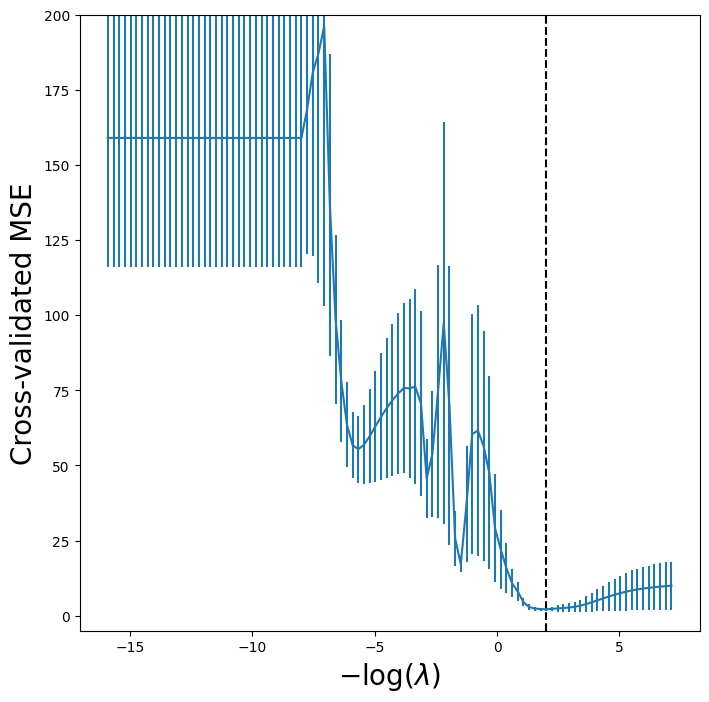

In [ ]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lassoCV.alphas_), lassoCV.mse_path_.mean(1), yerr=lassoCV.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(lassoCV.alpha_), c='k', ls='--')
ax.set_ylim([-5, 200])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [ ]:
lassoCV.coef_

array([ 1.81664933e+00,  1.05329987e+00,  3.59819631e+00,  6.32746580e-01,
        2.42349362e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -6.06113994e-03, -2.06264097e-03])

#### Results (e) -
* Our estimate for the best $λ$ is around 1 which we can see is true on this graph.

* The graph also shows that our MSE normalizes around that min value mark and costs at 10.

* At our min our MSE is around 5

* We can also see we made 3 zero coeficients from [97]. This shows it would be more rigid then linear regression so less variance but higher bias

* The last two coeficients are practically nonzero so overall this is a great model. The first 3 are the strongest which we know is the true result



### (f) Now generate a response vector Y according to the model

$Y = β_{0} + β_{7}X^{7} + ϵ$

and perform forward stepwise selection and the lasso. Discuss the results obtained.

In [ ]:
b0,b7 = 1,7
Y2 = b0 + b7*X**7 + noise

In [ ]:
df_Y2 = pd.DataFrame({'Y2': Y2})
df_Y2.head()

,Y2
0,209.408725
1,2.000043
2,1.323227
3,-9.867017
4,2.449826


In [ ]:
def stepwise(dir):
  design2 = MS(df_X).fit(df_X)
  strategy2 = Stepwise.first_peak(design2, direction = dir, max_terms = len(design2.terms))
  mse2 = sklearn_selected(OLS, strategy2)
  mse2.fit(df_X, df_Y2)
  print(mse2.selected_state_)

stepwise('forward')


('X1', 'X10', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9')
()


In [ ]:
def lassoCV2(lambdas, kfold):
  lassoCV2 = skl.ElasticNetCV(alphas = lambdas, l1_ratio =1, cv = kfold)
  lassoCV2.fit(df_X, df_Y2)
  print(lassoCV2.alpha_)
  print(lassoCV2.coef_)
  return lassoCV2
lambdas = 10**np.linspace(2, -50, 50) / Y2.std()
kfold = skm.KFold(n_splits = 10, random_state = 0, shuffle = True)
lCv2 = lassoCV2(lambdas, kfold)


2.815937282479774e-53
[ 5.05943819e+00  1.76976288e+00 -1.71778647e+01 -1.70139207e+00
  1.47199586e+01  1.07431722e-01  2.68102664e+00  4.55495599e-02
  4.06540862e-01 -3.73406664e-04]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,RidgeCV
trainedLasso = LassoCV(alphas = lambdas, cv = kfold)
trainedLasso.fit(df_X, df_Y2)
trainedLasso.alpha_
trainedLasso.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 5.05943819e+00,  1.76976288e+00, -1.71778647e+01, -1.70139207e+00,
        1.47199586e+01,  1.07431722e-01,  2.68102664e+00,  4.55495599e-02,
        4.06540862e-01, -3.73406664e-04])

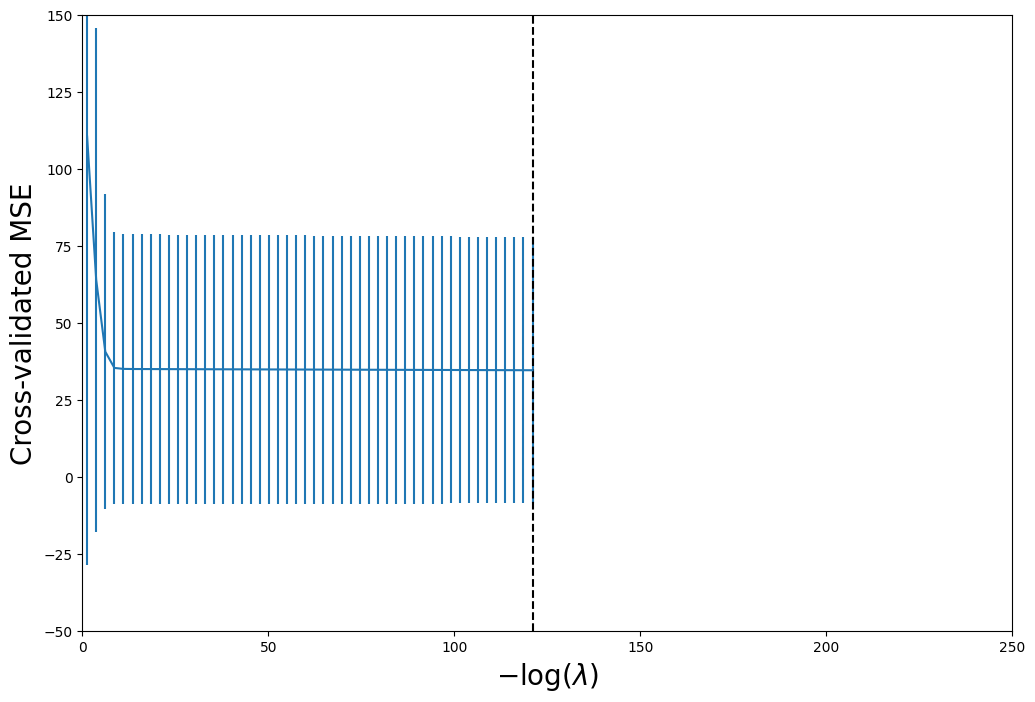

In [ ]:
lassoCV_fig, ax = subplots(figsize=(12,8))
ax.errorbar(-np.log(lCv2.alphas_), lCv2.mse_path_.mean(1), yerr=lCv2.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(lCv2.alpha_), c='k', ls='--')
ax.set_ylim([-50, 150])
ax.set_xlim([0, 250])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

#### Results (f) -

* The forward selection did not generate a great sample. We expected to see X7 at the front or least the first few elements.

* The lasso generated a much better sample even tho the values didn't go exactly to 0. $X_{7}$ is the second highest coefficient.

## Question 9 - In this exercise, we will predict the number of applications received using the other variables in the College data set.

### (a) Split the data set into a training set and a test set.

In [ ]:
college  = load_data('College')

In [ ]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
hotencode = {'Yes' : 1, 'No': 0}
college['Private'] = college['Private'].map(hotencode)

In [ ]:
results = []

In [ ]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
X_train, X_test, y_train, y_test = skm.train_test_split(college.drop('Apps', axis = 1), college['Apps'], test_size = 0.3, random_state = 0)

### (b) - Fit a linear model using least squares on the training set, and report the test error obtained.

In [ ]:
from sklearn.metrics import r2_score
lr = LinearRegression()
pred = lr.fit(X_train, y_train).predict(X_test)
score = r2_score(y_test, pred)
score
results += [score]


### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [ ]:
alphas = 10**np.linspace(10, -2, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = kfold)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=KFold(n_splits=10, random_state=0, shuffle=True))

In [ ]:
ridge_cv.alpha_

0.01

In [ ]:
pred = ridge_cv.predict(X_test)
score2 = r2_score(y_test, pred)
results += [score2]

In [ ]:
print(pd.Series(np.hstack([ridge_cv.intercept_,ridge_cv.coef_]),index = ['Intercept'] + list(college.drop('Apps',axis = 1).columns)))

Intercept     -323.580663
Private       -671.330025
Accept           1.260853
Enroll          -0.378688
Top10perc       52.619152
Top25perc      -16.154593
F.Undergrad      0.098952
P.Undergrad      0.037655
Outstate        -0.042852
Room.Board       0.217586
Books            0.035520
Personal        -0.045310
PhD             -9.465520
Terminal        -4.686864
S.F.Ratio        4.575274
perc.alumni     -7.541394
Expend           0.064438
Grad.Rate       10.583508
dtype: float64


#### Results -(c)

* Quite a few coefficicents are shrunk close to 0, but none are 0. Our $λ$ value is relatively small too.

### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefcient estimates.

In [ ]:
alphas = 10**np.linspace(4, -1, 100)
lasso = LassoCV(alphas = alphas, cv = kfold)
lasso.fit(X_train, y_train)
predict = lasso.predict(X_test)
print(lasso.alpha_)
print(lasso.coef_)
score3 = r2_score(y_test, predict)
results += [score3]

0.1
[-6.70176896e+02  1.26090181e+00 -3.78762140e-01  5.26166904e+01
 -1.61533665e+01  9.89790786e-02  3.76738838e-02 -4.29153047e-02
  2.17539680e-01  3.54739907e-02 -4.53107823e-02 -9.46076625e+00
 -4.68123734e+00  4.58185410e+00 -7.54237508e+00  6.44447510e-02
  1.05808207e+01]


In [ ]:
print(pd.Series(np.hstack([lasso.intercept_,lasso.coef_]),index = ['Intercept'] + list(college.drop('Apps',axis = 1).columns)))

Intercept     -324.438362
Private       -670.176896
Accept           1.260902
Enroll          -0.378762
Top10perc       52.616690
Top25perc      -16.153367
F.Undergrad      0.098979
P.Undergrad      0.037674
Outstate        -0.042915
Room.Board       0.217540
Books            0.035474
Personal        -0.045311
PhD             -9.460766
Terminal        -4.681237
S.F.Ratio        4.581854
perc.alumni     -7.542375
Expend           0.064445
Grad.Rate       10.580821
dtype: float64


#### Results (d) -

* None of my variable shrunk to 0
* Test error was relative to the two other methods. It was .9086

### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [154]:
def PCA_LR(n_):
  #scale X
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_train)

  #perform PCA on scaled X
  pca = PCA(n_components = n_)
  X_pc = pca.fit_transform(X_scaled)

  #Fit regression to perform PCA next step
  lr = skl.LinearRegression()
  lr.fit(X_pc, y_train)

  #Scale the test data
  X_test_scaled = scaler.transform(X_test)

  #Scale the test data to PCA
  X_test_pc = pca.transform(X_test_scaled)

  #Make prediction
  pred = lr.predict(X_test_pc)

  #Access Results
  score4 = r2_score(y_test, pred)
  print(score4)
  return score4
for i in range(5, 18):
  PCA_LR(i)

results += [PCA_LR(17)]

NameError: name 'r2_score' is not defined

#### Results (e) -

* We see using brute force that the perfect m value is 16. We can throw that into the formula and get a test error of .896. This is close to everything else we have gotten so far.

###(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
print(len(X_test.columns))

17


In [ ]:
nums = np.arange(1,18)
nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

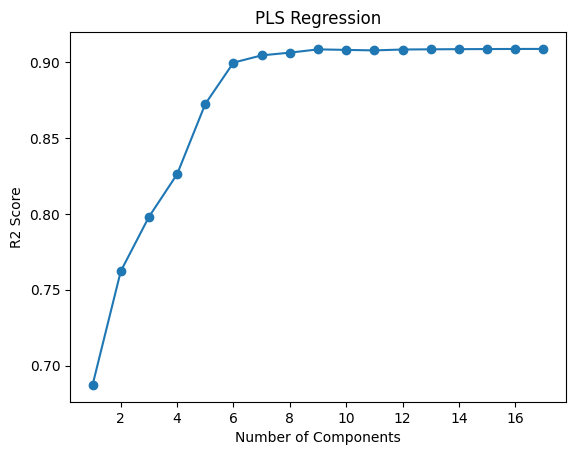

In [ ]:
cv_scores = []
for i in nums:
  pls = PLSRegression(n_components = i, scale = True)
  pls.fit(X_train, y_train)
  pred = pls.predict(X_test)
  cv_scores.append(r2_score(y_test, pred))

plt.plot(nums, cv_scores, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.title('PLS Regression')
plt.show()



In [ ]:
def PLS_LR(n_):
  pls = PLSRegression(n_components = n_, scale = True)
  pls.fit(X_train, y_train)
  pred = pls.predict(X_test)
  print(r2_score(y_test, pred))
  return r2_score(y_test, pred)

PLS_LR(5)
PLS_LR(8)
PLS_LR(10)
PLS_LR(16)

results += [PLS_LR(16)]

0.872357082260028
0.9061543809710665
0.9079656459092282
0.9085815415554497
0.9085815415554497


#### Results (f) -

* WE picked m by cross validation on the graph to be about 16 for the highest point. However the lower points limit variance and are within the standard error.

* Our total error was .9086. The same for PCR.

### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much diference among the test errors resulting from these five approaches?

In [ ]:
results = results[:4] + results[6:]

In [ ]:
results

[0.9086043157818366,
 0.9086055846364456,
 0.9086147742386906,
 0.9086043157818379,
 0.9085815415554497]

#### Results (g) -

* We can see all the test errors are extremely close. However the best test error came from 3 which was the Lasso. The second was Ridge Regression then PCR, linear regression, and lastly partial least squares.

* I am surprised least squares did as well since this was a high dimensionality problem. We were given an n = 4 and a p = 17. Thus p >> n so I thought linear regression shouldn't be used and would have a more inaccurate result.

## Question 10 - We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

### (a) Generate a data set with p = 20 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model:

$Y = Xβ + ϵ$

where β has some elements that are exactly equal to zero.

In [ ]:
X = np.random.normal(size = (1000,20))
np.random.seed(3)
X.shape

(1000, 20)

In [ ]:
beta = np.random.randint(-5,5,15)
beta = np.concatenate([beta, np.zeros(5)])
np.random.shuffle(beta)
beta

array([ 3.,  4.,  0.,  0.,  0.,  3.,  0.,  2., -5.,  4., -5.,  0.,  3.,
        4.,  0.,  0., -2., -1., -2.,  1.])

In [ ]:
beta = np.expand_dims(beta,axis = 1)
beta.shape

(20, 1)

In [ ]:
episoln = np.random.normal(size = (1000, 1))
episoln.size

1000

In [ ]:
y = X @ beta + episoln
y.size

1000

In [ ]:
X_df = pd.DataFrame(X, columns = ['X' + str(i) for i in range(1, 21)])
X_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,-0.872187,0.092690,0.787885,-0.020486,-0.076880,1.483449,-1.478500,-0.234454,0.287267,0.804139,-0.260500,-1.081968,0.845291,1.290444,-1.773522,-0.165538,0.371796,0.123992,-0.740068,-0.111009
1,0.049994,0.563837,-0.335828,0.343457,0.873081,-1.089910,-0.298043,0.740041,1.012292,-0.878115,0.484442,-0.849712,0.493278,0.741419,1.345808,-0.836448,-0.419355,-0.812067,0.996579,-0.212459
2,-1.204794,-0.540197,0.663404,-0.524935,-1.837910,-0.151063,0.024455,0.021926,-0.088185,-0.126625,0.284883,0.271352,-1.136791,-0.954670,1.342673,-2.354905,1.524166,0.192538,-0.767465,1.227834
3,0.108102,0.241814,0.165698,-1.928169,1.293805,0.010819,-0.039431,-0.796606,-0.741517,-0.093134,0.073399,-0.801302,-0.099960,-2.869297,1.822733,1.260078,1.402209,-1.502021,-0.488971,-0.746564
4,-0.450044,0.387524,-0.721148,-0.776296,-0.050965,-0.002092,-0.039705,-0.484991,0.486697,-0.915033,0.359457,1.357583,-0.877415,1.567192,-0.078666,-0.589173,1.287136,-1.698693,-0.362455,-0.486910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.734368,-1.612682,1.046075,-0.761072,0.800654,-1.547871,0.009263,-1.147625,1.890939,1.098998,-1.013920,-1.035728,-0.866566,0.894182,-0.283609,-0.484280,0.566566,-0.280402,0.510879,-0.327668
996,1.831905,0.180041,-0.474943,-0.201548,-0.355872,2.016238,1.126988,-0.267900,-1.576696,1.183835,-0.444720,-1.822818,-0.787265,0.526958,-1.181347,-0.536830,-0.029700,-2.338683,-0.056770,-0.319110
997,0.572481,0.558988,0.553799,0.541823,-0.276027,0.631609,0.799937,-1.502883,0.658139,-0.556825,-0.223043,0.008195,-0.892926,0.483183,-0.774288,-1.408305,-1.776126,1.003617,-0.543319,0.128223
998,-0.365154,2.341152,-0.270725,0.447778,-1.735958,-0.605400,0.093702,-0.593437,1.077934,-0.759466,-0.004445,0.638703,-0.719034,-0.281144,0.655789,-1.421067,-1.429664,0.265831,1.268151,1.348324


### (b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [ ]:
X_train, X_test, y_train, y_test = skm.train_test_split(X_df, y, test_size= .9, random_state = 0)
X_train.shape, X_test.shape

((100, 20), (900, 20))

### (c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [117]:
# Tried this and it didn't work. It was a good shot
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl # Import the linear_model module
import sklearn.model_selection as skm # Import the model_selection module

def MSE(X,y):
  X_train_subset, X_test_subset, y_train_subset, y_test_subset = skm.train_test_split(
      X, y, test_size=0.9, random_state=0  # Split the provided data
  )
  model = skl.LinearRegression().fit(X_train_subset,y_train_subset)
  pred = model.predict(X_test_subset)
  mse = mean_squared_error(y_test_subset, pred, squared=False) # Calculate root mean squared error instead of mean squared error
  # Instead of returning a single number, return an array of scores (one for each feature)
  return np.full(X.shape[1], mse) # Return an array of RMSE values, one for each feature


X_new = SelectKBest(MSE, k = 20).fit_transform(X_train, y_train)
print(X_new[0])
print(X_new[1])

[-0.97290287  1.00050067  0.92919783  1.6880822  -0.45368606 -1.3894061
 -0.34918212 -0.48426644 -0.77969516 -0.99659617 -0.94479133 -1.96352131
  0.82491616 -0.90140741 -0.82141878  0.72859556 -0.20518771 -0.10341497
  2.19903243  0.44072474]
[ 0.96650954 -0.88388779  0.21344602 -0.58866654  0.3581671  -1.88613194
  0.37408746 -2.65158218  0.97844266  0.94605656  0.41839124  1.04928902
  0.98530859  0.28528459 -0.82433128 -0.76762898  0.95277434  2.07194265
  1.06839764  0.13314233]


In [67]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    return model.ssr,model.rsquared,model, mse


In [70]:
from tqdm import tnrange, tqdm_notebook
from itertools import combinations

def run_subset_selection_with_return_models(X,y):
    #Initialization variables
    RSS_list, R_squared_list, feature_list = [],[],[]
    numb_features = []
    list_models = []
    list_train_mse = []

    #Looping over k = 1 to k = 11 features in X
    for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):
        best_features = None
        best_RSS = None
        best_r2 = 0
        best_model = None
        best_train_mse = 0

        #Looping over all possible combinations:
        for combo in combinations(X.columns,k):
            tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result
            r2 = tmp_result[1]
            if r2 > best_r2:
                best_features = combo
                best_RSS = tmp_result[0]
                best_r2 = tmp_result[1]
                best_model = tmp_result[2]
                best_train_mse = tmp_result[3]

        RSS_list.append(best_RSS)
        R_squared_list.append(best_r2)
        feature_list.append(best_features)
        numb_features.append(len(best_features))
        list_models.append(best_model)
        list_train_mse.append(best_train_mse)


    #Store in DataFrame
    df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list, 'features':feature_list, 'train_mse': list_train_mse})
    return df, list_train_mse, list_models

In [73]:
data, mse_error_train, mse_models = run_subset_selection_with_return_models(X_train.iloc[:, :10], y_train)
print(data)

<ipython-input-70-37002b54e77e>:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

   numb_features           RSS  R_squared  \
0              1  10559.632831   0.125658   
1              2   9160.965886   0.241469   
2              3   7715.041012   0.361192   
3              4   6456.056210   0.465436   
4              5   5865.265786   0.514354   
5              6   5243.965431   0.565798   
6              7   5202.508629   0.569230   
7              8   5170.893052   0.571848   
8              9   5158.643247   0.572862   
9             10   5150.232348   0.573559   

                                    features   train_mse  
0                                      (X9,)  105.596328  
1                                  (X9, X10)   91.609659  
2                              (X2, X9, X10)   77.150410  
3                          (X2, X6, X9, X10)   64.560562  
4                      (X2, X6, X8, X9, X10)   58.652658  
5                  (X1, X2, X6, X8, X9, X10)   52.439654  
6              (X1, X2, X3, X6, X8, X9, X10)   52.025086  
7          (X1, X2, X3, X4, X6, 

In [74]:
data

,numb_features,RSS,R_squared,features,train_mse
0,1,10559.632831,0.125658,"(X9,)",105.596328
1,2,9160.965886,0.241469,"(X9, X10)",91.609659
2,3,7715.041012,0.361192,"(X2, X9, X10)",77.150410
3,4,6456.056210,0.465436,"(X2, X6, X9, X10)",64.560562
4,5,5865.265786,0.514354,"(X2, X6, X8, X9, X10)",58.652658
5,6,5243.965431,0.565798,"(X1, X2, X6, X8, X9, X10)",52.439654
6,7,5202.508629,0.569230,"(X1, X2, X3, X6, X8, X9, X10)",52.025086
7,8,5170.893052,0.571848,"(X1, X2, X3, X4, X6, X8, X9, X10)",51.708931
8,9,5158.643247,0.572862,"(X1, X2, X3, X4, X6, X7, X8, X9, X10)",51.586432
9,10,5150.232348,0.573559,"(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)",51.502323


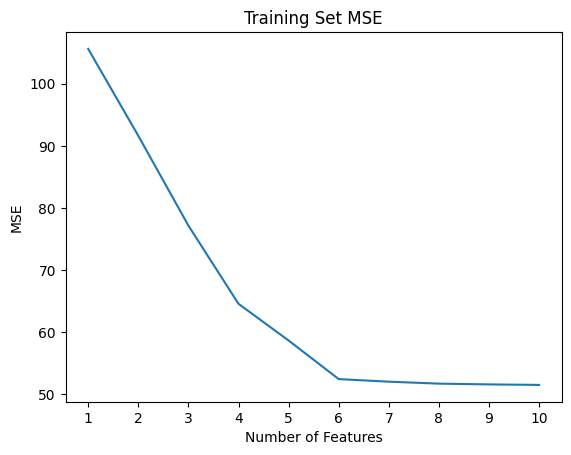

In [80]:
plt.plot(np.arange(1, 11),mse_error_train )
plt.xlabel('Number of Features')
plt.xticks(np.arange(1, 11))
plt.ylabel('MSE')
plt.title('Training Set MSE')
plt.show()

### (d) Plot the test set MSE associated with the best model of each size.

In [85]:
# Adding test_mse
test_mse = []
for model,features in zip(mse_models, data['features']):
    pred = model.predict(sm.add_constant(X_test.iloc[:,:12][list(features)]))
    test_mse.append(mean_squared_error(pred,y_test))
test_mse

[127.49252024526692,
 107.05862688280152,
 87.1589094952651,
 76.40879637230175,
 72.71962973242739,
 63.45671669853353,
 64.38214361944003,
 64.68056817888268,
 65.10168522586385,
 65.41786724196933]

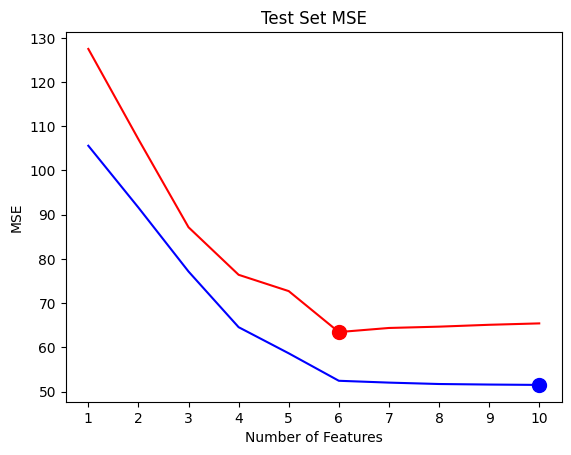

In [91]:
plt.plot(np.arange(1, 11),test_mse , color = 'red')
plt.plot(np.arange(1, 11),mse_error_train, color = 'blue')
minTest = min(test_mse)
minTrain = min(mse_error_train)
minTestIdx = test_mse.index(minTest)
minTrainIdx = mse_error_train.index(minTrain)
plt.plot(minTestIdx + 1, minTest, marker = 'o', markersize = 10, color = 'red')
plt.plot(minTrainIdx + 1, minTrain, marker = 'o', markersize = 10, color = 'blue')
plt.xlabel('Number of Features')
plt.xticks(np.arange(1, 11))
plt.ylabel('MSE')
plt.title('Test Set MSE')
plt.show();

###(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

#### Results (e) -

The min test error appears at 6 features as show above with the red dot. This makes sense compared to the train_mse which appears on 10. This is because as we add more features to the train data it does better since it increases variance and decrease bias. So it fits the data perfectly. However when tested on the test data, it does poorly. This is because the increase in variance is exposed on the test data compared. So less features is better so we don't overfit

### (f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefcient values.

In [116]:
b = beta[:10].flatten()
p = mse_models[5].params


t = np.array([])
for val in b:
  if val != 0:
    t = np.append(t, val)

df = pd.DataFrame({'predicted': p[1:], 'Actual': t})
df

[ 3.  4.  0.  0.  0.  3.  0.  2. -5.  4.]
const    0.339258
X1       2.819259
X2       4.496731
X6       3.756995
X8       2.725408
X9      -4.361187
X10      4.316217
dtype: float64
[ 3.  4.  3.  2. -5.  4.]


,predicted,Actual
X1,2.819259,3.0
X2,4.496731,4.0
X6,3.756995,3.0
X8,2.725408,2.0
X9,-4.361187,-5.0
X10,4.316217,4.0


#### Results (f)-

As you can see from the above table. The results are close to the Actual Values. This model predicted it well and got rid of the value 0 features.

### (g) Create a plot displaying

$\sqrt{∑_{j =1}^{p}(β_{j} - β_{j}^{r})^{2}}$

for a range of values of r. How does it compare to the plot from (d) where we graphed test mse.

In [118]:
l2_norms = []
for model in mse_models:
    params = model.params.values[1:]
    l2_norms.append(np.linalg.norm(params))
l2_norms

[3.598285689799195,
 5.760031693885102,
 7.60161125956411,
 8.773777513836114,
 8.921066152229649,
 9.346729186776805,
 9.498061595999578,
 9.56354193722906,
 9.620718472180323,
 9.696815123689234]

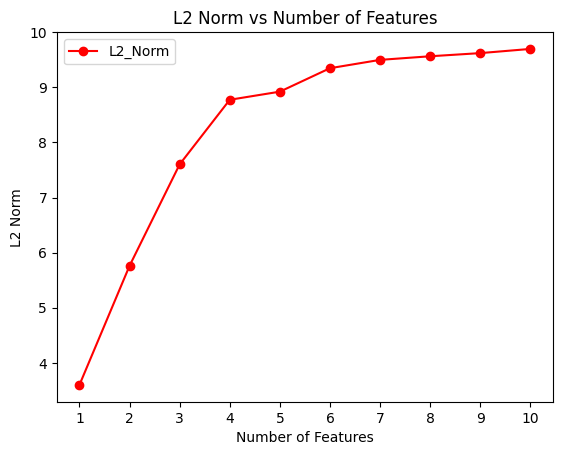

In [122]:
plt.plot(np.arange(1,11), l2_norms, marker = 'o', color = 'red')
plt.xlabel('Number of Features')
plt.xticks(np.arange(1, 11))
plt.ylabel('L2 Norm')
plt.legend(['L2_Norm'])
plt.title('L2 Norm vs Number of Features')
plt.show()

#### Results (g) -

It seems the results are more similar to train MSE as the best result occurs at 10 features. However the value at 6 is around the standard error of the value at 10. So we could take the value at 6 like the test MSE.

## Question 11 -We will now try to predict per capita crime rate in the Boston data set.

### (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [124]:
boston = load_data('Boston')

In [125]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [127]:
X_train, X_test, y_train, y_test = skm.train_test_split(boston.drop('crim', axis =1), boston['crim'], test_size = .25, random_state = 1 )

In [128]:
results = {}

#### Linear Regression

In [132]:
lr = skl.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
results['LinearRegression'] = mse
print( results['LinearRegression'])


15.931881926334023


#### Best Subset Selection

In [133]:
data, mse_error_train, mse_models = run_subset_selection_with_return_models(X_train, y_train)

<ipython-input-70-37002b54e77e>:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/12 [00:00<?, ?it/s]

In [184]:
min_error = min(mse_error_train)
min_error_idx = mse_error_train.index(min_error)
min_model = mse_models[min_error_idx]
pred = min_model.predict(sm.add_constant(X_test))
mse = mean_squared_error(y_test, pred)
results['BestSubsetSelection'] = mse
print(results['BestSubsetSelection'])

15.931881926334134


#### The Lasso

In [142]:
lassocv = skl.LassoCV(alphas = 10**np.linspace(-2, 2, 100), cv = kfold)
lassocv.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05480231e-0...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

In [144]:
score = lassocv.score(X_test, y_test)
score

0.5134696596225012

In [145]:
pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test, pred)
results['Lasso'] = mse
print(results['Lasso'])

15.626818628973941


#### Ridge Regression


In [151]:
ridge = skl.RidgeCV(alphas = np.linspace(1.25, 5, 100), cv = kfold)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.25      , 1.28787879, 1.32575758, 1.36363636, 1.40151515,
       1.43939394, 1.47727273, 1.51515152, 1.5530303 , 1.59090909,
       1.62878788, 1.66666667, 1.70454545, 1.74242424, 1.78030303,
       1.81818182, 1.85606061, 1.89393939, 1.93181818, 1.96969697,
       2.00757576, 2.04545455, 2.08333333, 2.12121212, 2.15909091,
       2.1969697 , 2.23484848, 2.27272727, 2.31060606, 2.34848485,
       2.3863...
       3.90151515, 3.93939394, 3.97727273, 4.01515152, 4.0530303 ,
       4.09090909, 4.12878788, 4.16666667, 4.20454545, 4.24242424,
       4.28030303, 4.31818182, 4.35606061, 4.39393939, 4.43181818,
       4.46969697, 4.50757576, 4.54545455, 4.58333333, 4.62121212,
       4.65909091, 4.6969697 , 4.73484848, 4.77272727, 4.81060606,
       4.84848485, 4.88636364, 4.92424242, 4.96212121, 5.        ]),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

In [152]:
pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, pred)
results['Ridge'] = mse
print(results['Ridge'])

15.474701153040094


#### Principal Component Regression

In [159]:
def PCA_LR(n_):
  #scale X
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_train)

  #perform PCA on scaled X
  pca = PCA(n_components = n_)
  X_pc = pca.fit_transform(X_scaled)

  #Fit regression to perform PCA next step
  lr = skl.LinearRegression()
  lr.fit(X_pc, y_train)

  #Scale the test data
  X_test_scaled = scaler.transform(X_test)

  #Scale the test data to PCA
  X_test_pc = pca.transform(X_test_scaled)

  #Make prediction
  pred = lr.predict(X_test_pc)

  #Access Results
  mse = mean_squared_error(y_test, pred)
  return mse
min_mse = float('inf')
for i in range(1, len(X_test.columns)):
  min_mse = min(min_mse, PCA_LR(i))
results['PCR'] = min_mse
print(results['PCR'])

14.719052953074284


#### Partial Least Squares


In [164]:
def partialLeastSquares(n: int):
    pls = PLSRegression(n_components = n, scale = True)
    pls.fit(X_train, y_train)
    pred = pls.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    return mse


minPLS = float('inf')
for i in range(1, len(X_test.columns)):
  minPLS= min(minPLS, partialLeastSquares(i))


results['PLS'] = minPLS
print(results['PLS'])

14.985605363239106


#### Forward Selection

In [182]:
def forwardSelection(term: int):
  design = MS(X_train).fit(X_train)
  strategy = Stepwise.first_peak(design, direction = 'forward', max_terms = term)
  mse = sklearn_selected(OLS, strategy)
  mse.fit(X_train, y_train)
  pred = mse.predict(X_test)
  ms = mean_squared_error(y_test, pred)
  return ms, mse
min_mse = float('inf')
states = []
for i in range(1, len(X_test.columns)):
  m, states = forwardSelection(i)
  if min_mse > m:
    min_mse = m
    state = states
results['forwardStepwise'] = min_mse

In [180]:
min_mse, states.selected_state_

(13.974786261323056,
 ('chas',
  'dis',
  'indus',
  'lstat',
  'medv',
  'nox',
  'ptratio',
  'rad',
  'rm',
  'tax',
  'zn'))

In [188]:
#IT only got rid of age


#### BackWard Stepwise Selection

In [183]:
def backwardSelection(term: int):
  design = MS(X_train).fit(X_train)
  strategy = Stepwise.first_peak(design, direction = 'backward', max_terms = term)
  mse = sklearn_selected(OLS, strategy)
  mse.fit(X_train, y_train)
  pred = mse.predict(X_test)
  ms = mean_squared_error(y_test, pred)
  return ms, mse
min_mse = float('inf')
states = []
for i in range(1, len(X_test.columns)):
  m, states = forwardSelection(i)
  if min_mse > m:
    min_mse = m
    state = states
results['backwards'] = min_mse

In [189]:
states.selected_state_

('chas',
 'dis',
 'indus',
 'lstat',
 'medv',
 'nox',
 'ptratio',
 'rad',
 'rm',
 'tax',
 'zn')

In [190]:
#Also only got rid of age

In [185]:
results

{'LinearRegression': 15.931881926334023,
 'BestSubsetSelection': 15.931881926334134,
 'Lasso': 15.626818628973941,
 'Ridge': 15.474701153040094,
 'PCR': 14.719052953074284,
 'PLS': 14.985605363239106,
 'forwardStepwise': 13.974786261323056,
 'backwards': 13.974786261323056}

In [163]:
boston.shape

(506, 13)

#### Results - (a)

* The best result is the forward and backward then PCR for mean squared error then in second is PLS. These two performed way above everyone else. Then came Ridge and Lasso in the middle of the pack. Linear Regression and Best subset performed the worst.

### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.

* On the above sets we used test error and used cross validations on the methods to find the lowest error.

* The PLS and PCR performed the best since I believe this data did not contain high linearity which these models are normally used for. However the transformation was extremely useful to find the important features to predict crime. The lasso/ ridge also performed well on transforming certain features. So it seems not every feature we useful.

* I think PCR and PLS performed better than ridge since they were able to discard certain features and limit that variance compared a higher variance, low bias model. So I would say the variance increases more than the bias decreased

### (c) Does your chosen model involve all of the features in the data set? Why or why not?

* The model doesn't involve all the features in the data set. It doesn't since this would increase variance at a benefit of decreasing bias. However for this data it seems at a certain threshold the increase in variance is greater than the decrease in bias. At that exact point we want to stop adding features. Hence not all features are added!